# FUNGUS / BACTERIAL MYCETOMA CLASSIFICATION

## Method : bayesian classifier

<p> Reminders about data :
    <ul>
        <li> FM : fungus / BM : bacterial
        <li> label = type + n°patient + _ + n°grain
    </ul>
</p>

In [81]:
%run dataManagement.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc_curve

##### 1) Getting data

In [83]:
file1 = './Data/radiomics_features_set1.csv'
file2 = './Data/radiomics_features_set2.csv'

In [84]:
data = readCSV(file1,file2)

##### 2) Defining training and testing data

In [85]:
# notation : 0 for Fungus / 1 for Bacterial

In [86]:
# mycetoma type
y = getLabels(data)

# associated data
X = getData(data)

In [87]:
# preprocessing the data to remove negative numbers
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print("Training data dimension :",X_train.shape)
print("Test data dimension :",X_test.shape)

Training data dimension : (646, 102)
Test data dimension : (216, 102)


##### 3) Learning

- Gaussian Naive Bayes algorithm

In [89]:
gaussian = GaussianNB()

In [90]:
y_gauss = gaussian.fit(X_train,y_train).predict(X_test)

- Multinomial Naive Bayes algorithm

In [91]:
multinomial = MultinomialNB()

In [92]:
y_multi = multinomial.fit(X_train,y_train).predict(X_test)

- Complement Naive Bayes

In [93]:
complement = ComplementNB()

In [94]:
y_compl = complement.fit(X_train,y_train).predict(X_test)

- Bernoulli algorithm

In [95]:
bernoulli = BernoulliNB()

In [96]:
y_bern = bernoulli.fit(X_train,y_train).predict(X_test)

- Categorical

In [97]:
categorical = CategoricalNB(min_categories=102)

In [98]:
y_cat = categorical.fit(X_train,y_train).predict(X_test)

##### 4) Testing

- cross-validation

In [100]:
cv_gauss = cross_val_score(gaussian, X, y)
print("---> with gaussian :", cv_gauss)

---> with gaussian : [0.8265896  0.83815029 0.84302326 0.9127907  0.86046512]


In [101]:
cv_multi = cross_val_score(multinomial, X, y)
print("---> with multinomial :",cv_multi)

---> with multinomial : [0.82080925 0.84971098 0.8372093  0.90697674 0.86046512]


In [102]:
cv_compl = cross_val_score(complement, X, y)
print("---> with complement :",cv_compl)

---> with complement : [0.84393064 0.86127168 0.8372093  0.9127907  0.84302326]


In [103]:
cv_bern = cross_val_score(bernoulli, X, y)
print("---> with bernoulli :",cv_bern)

---> with bernoulli : [0.53757225 0.53757225 0.55232558 0.54069767 0.55813953]


In [104]:
cv_cat = cross_val_score(categorical, X, y)
print("---> with categorical :",cv_cat)

---> with categorical : [0.54913295 0.5433526  0.54651163 0.54651163 0.54651163]


- confusion matrix

---> with gaussian :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

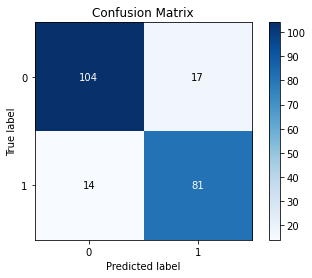

In [105]:
print("---> with gaussian :")
plot_confusion_matrix(y_test,y_gauss)

---> with multinomial :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

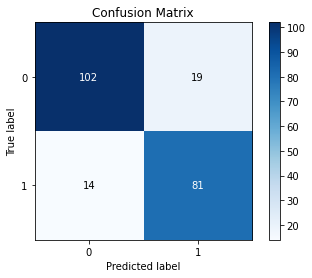

In [106]:
print("---> with multinomial :")
plot_confusion_matrix(y_test,y_multi)

---> with complement :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

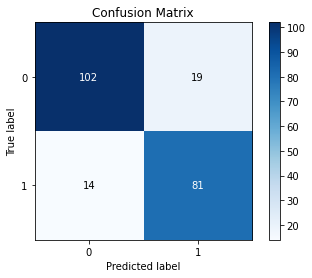

In [107]:
print("---> with complement :")
plot_confusion_matrix(y_test,y_compl)

---> with bernoulli :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

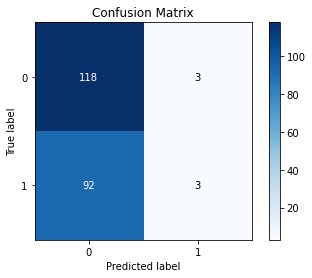

In [108]:
print("---> with bernoulli :")
plot_confusion_matrix(y_test,y_bern)

---> with categorical :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

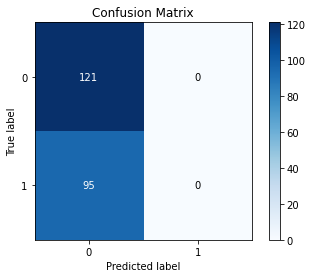

In [109]:
print("---> with categorical :")
plot_confusion_matrix(y_test,y_cat)

- precision, recall, F-measure

<p> Reminder :
    <ul>
        <li> Precision quantifies the number of positive class predictions that actually belong to the positive class.
        <li> Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
        <li> F-measure provides a single score that balances both the concerns of precision and recall in one number.
    </ul>
</p>

In [110]:
f1_gauss = f1_score(y_test,y_gauss)
print("---> with gaussian :",f1_gauss)

---> with gaussian : 0.839378238341969


In [111]:
f1_multi = f1_score(y_test,y_multi)
print("---> with multinomial :",f1_multi)

---> with multinomial : 0.8307692307692308


In [112]:
f1_compl = f1_score(y_test,y_compl)
print("---> with complement :",f1_compl)

---> with complement : 0.8307692307692308


In [113]:
f1_bern = f1_score(y_test,y_bern)
print("---> with bernoulli :",f1_bern)

---> with bernoulli : 0.05940594059405941


In [114]:
f1_cat = f1_score(y_test,y_cat)
print("---> with categorical :",f1_cat)

---> with categorical : 0.0


- roc curves

---> with gaussian :


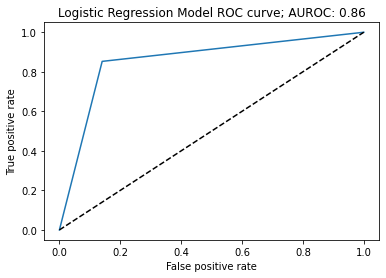

In [115]:
print("---> with gaussian :")

fpr,tpr,thresholds = roc_curve(y_test,y_gauss)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_gauss), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with multinomial :


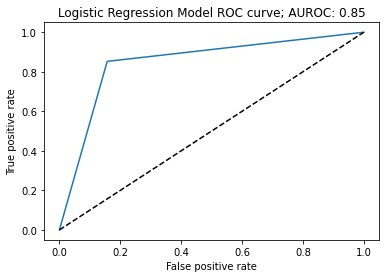

In [116]:
print("---> with multinomial :")


fpr,tpr,thresholds = roc_curve(y_test,y_multi)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_multi), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with complement :


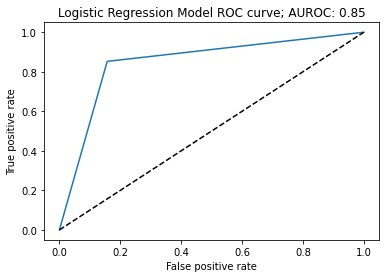

In [117]:
print("---> with complement :")

fpr,tpr,thresholds = roc_curve(y_test,y_compl)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_compl), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with bernoulli :


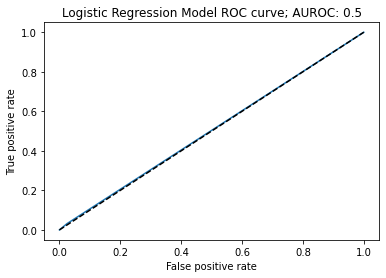

In [118]:
print("---> with bernoulli :")

fpr,tpr,thresholds = roc_curve(y_test,y_bern)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_bern), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with categorical :


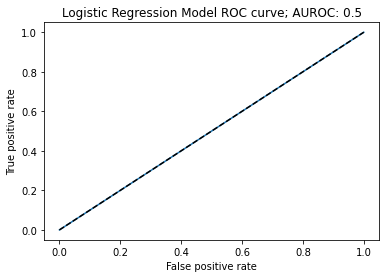

In [119]:
print("---> with categorical :")

fpr,tpr,thresholds = roc_curve(y_test,y_cat)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_cat), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()